# Find the local minima of the function y=(x+5)² starting from the point x=3


Step 1 : Initialize x =3. Then, find the gradient of the function, dy/dx = 2*(x+5).

Step 2 : Move in the direction of the negative of the gradient. We use a learning rate. Let us assume the learning rate → 0.01

Step 3 : Let’s perform 2 iterations of gradient descent

Step 4 : We can observe that the X value is slowly decreasing and should converge to -5 (the local minima). However, how many iterations should we perform?

# 作業:
    請嘗試使用不同的組合驗證 learning rate 對所需 iteration 的影響
    lr = [0.1, 0.0001]
    主要驗證 Lr 對於grandient 收斂的速度
    

In [1]:
precision = 0.000001 #This tells us when to stop the algorithm
max_iters = 10000 # maximum number of iterations
df = lambda x: 2*(x+5) #Gradient of our function 

In [2]:
lr_list = [0.0001, 0.001, 0.01, 0.1, 0.9] # Learning rate
previous_step_size = 1
cur_x = 3 # The algorithm starts at x=3
iters = 0 #iteration counter
previous_step_size = 1

iters_history = [[], [], [], [], []]
x_history = [[], [], [], [], []]

for i in range(len(lr_list)):
    lr = lr_list[i]
    cur_x = 3 # The algorithm starts at x=3
    iters = 0 #iteration counter
    previous_step_size = 1
    
    while previous_step_size > precision and iters < max_iters:
        prev_x = cur_x #Store current x value in prev_x
        cur_x = cur_x - lr * df(prev_x) #Gradient descent
        previous_step_size = abs(cur_x - prev_x) # 取較大的值, Change in x
        iters = iters+1 #iteration count
        # Store parameters for plotting
        iters_history[i].append(iters)
        x_history[i].append(cur_x)

iters_history.append(iters)
x_history.append(cur_x)

In [3]:
for i in range(len(lr_list)):
    print(f"Learning Rate:{lr_list[i]},\
    iteations:{iters_history[i][-1]}, local minimum occurs at {x_history[i][-1]} \n")

Learning Rate:0.0001,    iteations:10000, local minimum occurs at -3.917534277778167 

Learning Rate:0.001,    iteations:4837, local minimum occurs at -4.999501668667748 

Learning Rate:0.01,    iteations:595, local minimum occurs at -4.9999518490318176 

Learning Rate:0.1,    iteations:66, local minimum occurs at -4.999996786123911 

Learning Rate:0.9,    iteations:75, local minimum occurs at -5.000000431359147 



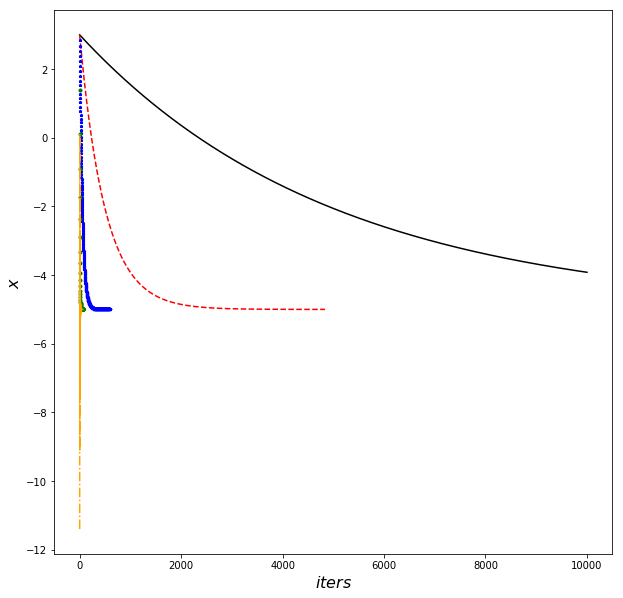

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.figure(figsize=(10, 10))
plt.plot(iters_history[0], x_history[0], '-', ms=3, lw=1.5, color='black')
plt.plot(iters_history[1], x_history[1], '--', ms=3, lw=1.5, color='red')
plt.plot(iters_history[2], x_history[2], '*', ms=3, lw=1.5, color='blue')
plt.plot(iters_history[3], x_history[3], 'o', ms=3, lw=1.5, color='green')
plt.plot(iters_history[4], x_history[4], '-.', ms=3, lw=1.5, color='orange')
plt.xlabel(r'$iters$', fontsize=16)
plt.ylabel(r'$x$', fontsize=16)
plt.show()

* 從上圖可以看到，Learning rate 的太小與收斂的速度快慢有關。
* 太小時會訓練次數到達都還沒有收斂完成；
* Learning rate 逐漸變大，收斂速度就增快許多，但是太大反而會有震盪的現象出現，因此需要小心挑選 Learning Rate.